In [1]:
import sys,os
from math import *
from scipy.integrate import dblquad

import h5py
import numpy as np
from numpy import square as sqr
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy
from stylelib.ase1_styles import ase1_runs_stl, ase1_sims_stl
plt.style.use(ase1_sims_stl)
from FP_pass_para_CN import FPPassiveParaCNSolver
from FP_initial_conditions import *


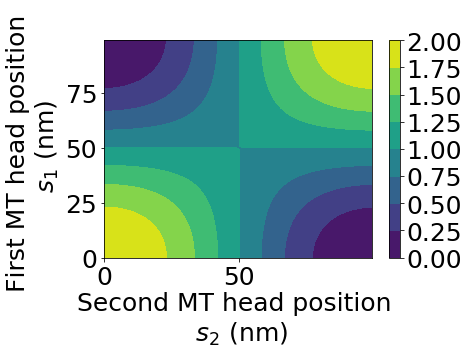

In [24]:
# Testing initial condition function
L1 = 100
L2 = 100
ds = 1
s1 = s2 = np.arange(0, 100, ds)
gamma = 1. 
beta = 1.
Y,X = np.meshgrid(s1, s2)
Z = C11Neumann(0, X, Y, L1, L2, gamma, beta)
h = plt.contourf(X,Y,Z)
plt.ylabel('First MT head position \n $s_1$ (nm)')
plt.xlabel('Second MT head position \n $s_2$ (nm)')
plt.colorbar(h)
plt.show()

In [3]:
# Testing solver initialization
pde_solver = FPPassiveParaCNSolver('tests/CN_tests/para_tests/dt_tests/simulations/dt1.0000_nwrite10/s0/FP_passive_params.yaml')

Time step:  1.0
Total time:  1000.0
Number of steps:  1000.0
ds1:  1.0
ds2:  1.0
  (0, 0)	2.0
  (1, 0)	1.9995065603657316
  (2, 0)	1.9980267284282716
  (3, 0)	1.99556196460308
  (4, 0)	1.992114701314478
  (5, 0)	1.9876883405951378
  (6, 0)	1.9822872507286888
  (7, 0)	1.9759167619387474
  (8, 0)	1.968583161128631
  (9, 0)	1.960293685676943
  (10, 0)	1.9510565162951536
  (11, 0)	1.9408807689542256
  (12, 0)	1.9297764858882513
  (13, 0)	1.917754625683981
  (14, 0)	1.9048270524660196
  (15, 0)	1.8910065241883678
  (16, 0)	1.8763066800438635
  (17, 0)	1.8607420270039436
  (18, 0)	1.844327925502015
  (19, 0)	1.8270805742745617
  (20, 0)	1.8090169943749475
  (21, 0)	1.7901550123756904
  (22, 0)	1.770513242775789
  (23, 0)	1.7501110696304596
  (24, 0)	1.7289686274214116
  :	:
  (77, 101)	1.7497409350986004
  (78, 101)	1.7701330410030751
  (79, 101)	1.7897651185753685
  (80, 101)	1.808617793325126
  (81, 101)	1.8266724599384814
  (82, 101)	1.843911300639253
  (83, 101)	1.8603173027729394
  (84,

[[2.00000000e+00 1.99950656e+00 1.99802673e+00 ... 4.93439634e-04
  0.00000000e+00 4.93439634e-04]
 [1.99950656e+00 1.99901336e+00 1.99753426e+00 ... 9.86635786e-04
  4.93439634e-04 9.86635786e-04]
 [1.99802673e+00 1.99753426e+00 1.99605735e+00 ... 2.46573752e-03
  1.97327157e-03 2.46573752e-03]
 ...
 [4.93439634e-04 9.86635786e-04 2.46573752e-03 ... 1.99901336e+00
  1.99950656e+00 1.99901336e+00]
 [0.00000000e+00 4.93439634e-04 1.97327157e-03 ... 1.99950656e+00
  2.00000000e+00 1.99950656e+00]
 [4.93439634e-04 9.86635786e-04 2.46573752e-03 ... 1.99901336e+00
  1.99950656e+00 1.99901336e+00]]


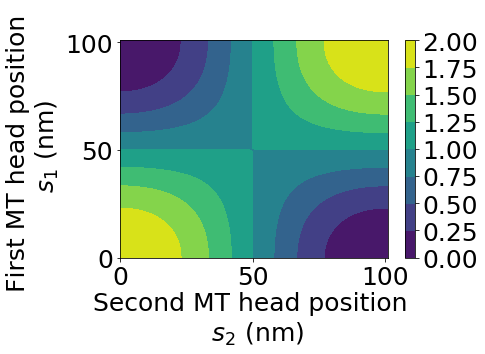

In [4]:
grid = C11NeumannInit(pde_solver)
print(grid.todense())
s1 = np.asarray(pde_solver.s1)
#print(s1)
s2 = np.asarray(pde_solver.s2)
cs = plt.contourf(s1, s2, np.transpose(grid.todense()))
plt.ylabel('First MT head position \n $s_1$ (nm)')
plt.xlabel('Second MT head position \n $s_2$ (nm)')
plt.colorbar(cs)
plt.show()

In [5]:
pde_solver.Save()

Point in time:  10
Summed error at time:  0.4824785159297608


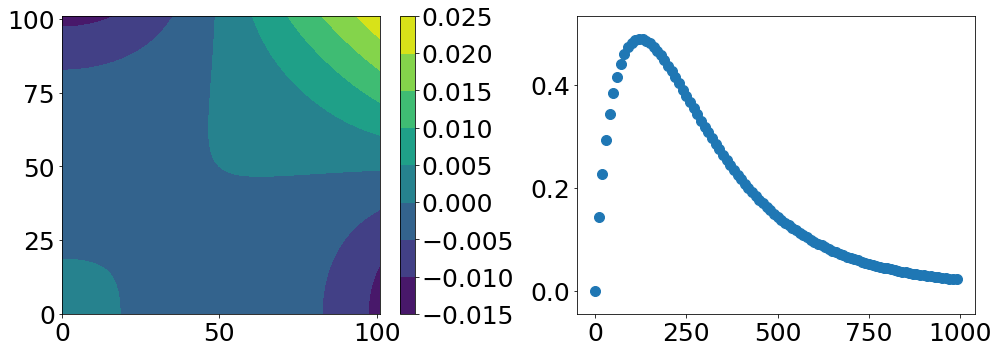

In [25]:
# Read in h5py file
h5_data = h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt1.0000_nwrite10/s0/FP_pass_para_CN.h5', 'r')
L1 = h5_data.attrs['L1']
L2 = h5_data.attrs['L2']
gamma = h5_data.attrs['gamma']
beta = h5_data.attrs['beta']
dt = h5_data.attrs['dt']
# Get time points
time = np.asarray(h5_data['time'])
nt = np.asarray(time.size)
err_arr = np.zeros(nt-1)
rel_err_arr = np.zeros(nt-1)
# Get solution and space points
xl_dist = np.asarray(h5_data['XL_data/XL_distr'])
s1 = np.asarray(h5_data['MT_data/s1'])
s2 = np.asarray(h5_data['MT_data/s2'])

# Loop over time and get error for each step

Y,X = np.meshgrid(s1, s2)
for i in range(nt-1):
    Z = C11Neumann(time[i], X, Y, L1, L2, gamma, beta)
    err = xl_dist[:,:,i] - Z
    #err_arr[i] = dt*np.sum(err)
    err_arr[i] = np.sqrt(dt*np.sum(np.square(err)))

time_point = 10
err_grid = xl_dist[:,:,time_point] - C11Neumann(time[time_point], X, Y, L1, L2, gamma, beta)
#print(err_grid)
#print(np.sqrt(dt*np.sum(np.square(err_grid))))
print("Point in time: ", time_point)
print("Summed error at time: ", np.sqrt(dt*np.sum(np.square(err_grid))))
fig, axarr = plt.subplots(1,2, figsize=(14,5))
cs = axarr[0].contourf(X,Y,err_grid)
fig.colorbar(cs, ax=axarr[0])
axarr[1].scatter(time[:-1], err_arr)

plt.tight_layout()


# Plot error as function of time

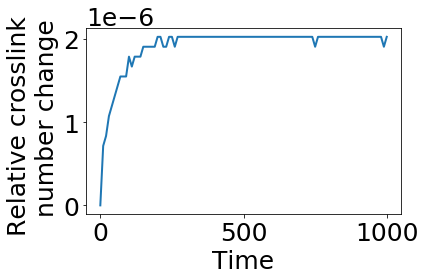

In [7]:
# Plot number of crosslinks over time
xl_num_arr = np.zeros(nt)
n_tot = np.sum(xl_dist[:,:,0])
for i in range(nt):
    xl_num_arr[i] = (np.sum(xl_dist[:,:,i])/n_tot)-1

plt.plot(time, xl_num_arr)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.ylabel("Relative crosslink \n number change")
plt.xlabel("Time")
plt.tight_layout()



(1, 2)


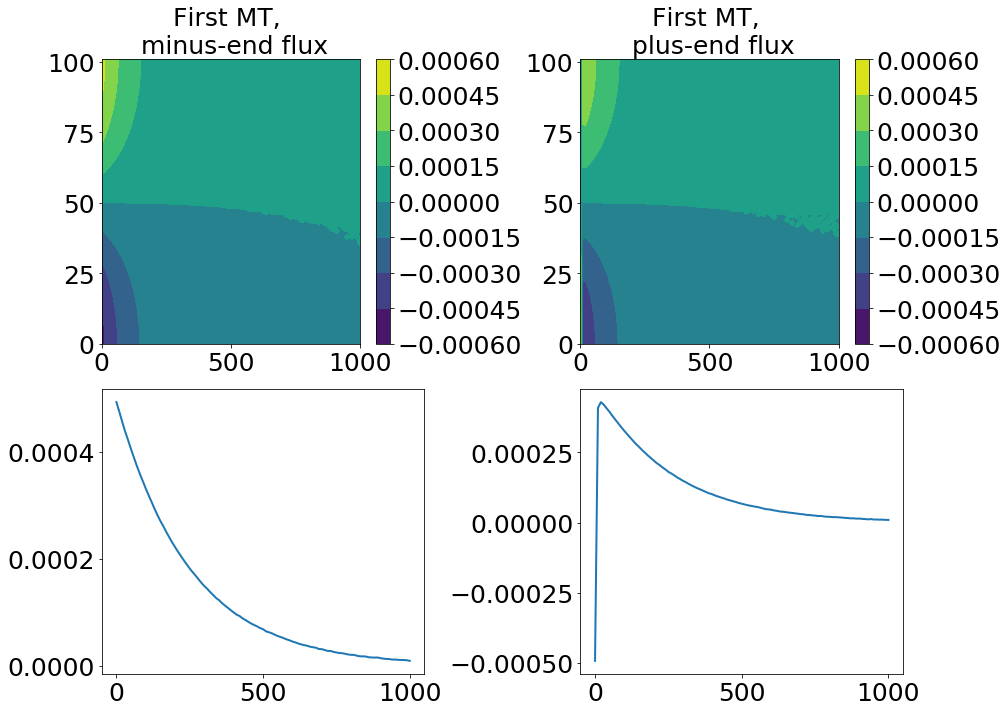

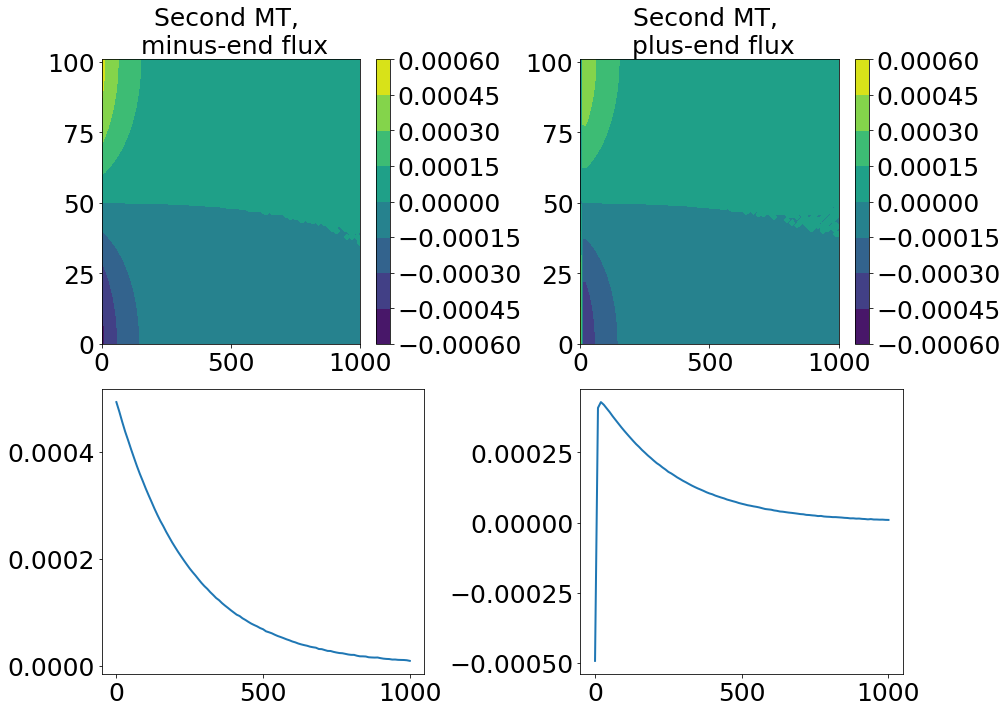

In [8]:
# Get the flux at the edge of tubules (Minus and plus ends of both microtubules)
# This is a first order accurate calculation whereas the solver should be second order accurate

deriv_ds = np.asarray([[-1./ds,1./ds]])
print(deriv_ds.shape)
## S1 minus end flux
# Rearrange matrix slice to so you can perform matrix operations accurately
S1m_flux = np.swapaxes(xl_dist[0:2,:, :],0,2)
S1m_flux = np.swapaxes(S1m_flux,1,2)
# Take first order derivative
S1m_flux = np.squeeze(np.matmul(deriv_ds, S1m_flux)) # First index is time, second index is other tubule location

## S1 Plus end flux
S1p_flux = np.swapaxes(xl_dist[-2:,:, :],0,2)
S1p_flux = np.swapaxes(S1p_flux,1,2)
S1p_flux = np.squeeze(np.matmul(deriv_ds, S1p_flux))

## S2 minus end flux
S2m_flux = np.swapaxes(xl_dist[:,0:2, :],0,2)
S2m_flux = np.swapaxes(S2m_flux,1,2)
S2m_flux = np.squeeze(np.matmul(S2m_flux, deriv_ds.T)) 

## S2 Plus end flux
S2p_flux = np.swapaxes(xl_dist[:,-2:, :],0,2)
S2p_flux = np.swapaxes(S2p_flux,1,2)
S2p_flux = np.squeeze(np.matmul(S2p_flux, deriv_ds.T))

# Graphing
fig, axarr = plt.subplots(2,2, figsize=(14,10))
csm = axarr[0,0].contourf(time, s2, S1m_flux[:-1,:].T)
fig.colorbar(csm, ax=axarr[0,0])
csp = axarr[0,1].contourf(time, s2, S1p_flux[:-1,:].T)
fig.colorbar(csp, ax=axarr[0,1])
axarr[1,0].plot(time, np.sum(S1m_flux[:-1,:],axis=1))
axarr[1,1].plot(time, np.sum(S1p_flux[:-1,:],axis=1))
axarr[0,0].set_title("First MT, \n minus-end flux")
axarr[0,1].set_title("First MT, \n plus-end flux")
plt.tight_layout()

fig2, axarr2 = plt.subplots(2,2, figsize=(14,10))
cs2m = axarr2[0,0].contourf(time, s1, S2m_flux[:-1,:].T)
fig2.colorbar(cs2m, ax=axarr2[0,0])
cs2p = axarr2[0,1].contourf(time, s1, S2p_flux[:-1,:].T)
fig2.colorbar(cs2p, ax=axarr2[0,1])
axarr2[1,0].plot(time, np.sum(S2m_flux[:-1,:],axis=1))
axarr2[1,1].plot(time, np.sum(S2p_flux[:-1,:],axis=1))
axarr2[0,0].set_title("Second MT, \n minus-end flux")
axarr2[0,1].set_title("Second MT, \n plus-end flux")
plt.tight_layout()

[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]
 ...
 [  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]]


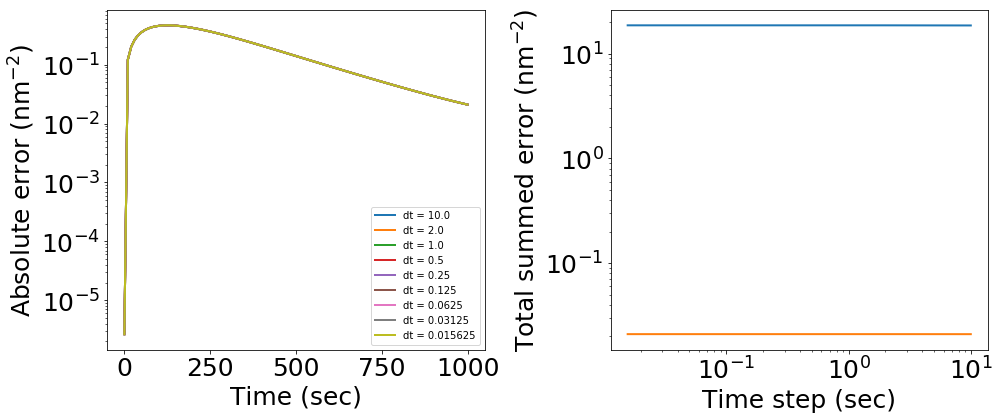

In [9]:
h5_data_arr = [
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt10.0000_nwrite1/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt2.0000_nwrite5/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt1.0000_nwrite10/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt0.5000_nwrite20/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt0.2500_nwrite40/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt0.1250_nwrite80/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt0.0625_nwrite160/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt0.0312_nwrite320/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/dt_tests/simulations/dt0.0157_nwrite640/s0/FP_pass_para_CN.h5', 'r')]
### Get all attributes
L1 = h5_data_arr[0].attrs['L1']
L2 = h5_data_arr[0].attrs['L2']

gamma = h5_data_arr[0].attrs['gamma']
beta = h5_data_arr[0].attrs['beta']
dt_arr = [dat.attrs['dt'] for dat in h5_data_arr]
# Get time points
time = np.asarray(h5_data_arr[0]['time'])
nt = np.asarray(time.size)
err_arr = np.zeros(nt)
# Get solution and space points
s1 = np.asarray(h5_data_arr[0]['MT_data/s1'])
s2 = np.asarray(h5_data_arr[0]['MT_data/s2'])
X, Y = np.meshgrid(s1[:-1], s2[:-1])
print(X)

# Get error over time for each run
err_time_arr = [np.zeros(nt) for i in range(len(dt_arr))]
tot_sum_err_arr = []
tot_end_err_arr = []
for dat, dt, err_arr in zip(h5_data_arr, dt_arr, err_time_arr):
    xl_dist = np.asarray(dat['XL_data/XL_distr'])
    for i in range(nt):
        Z = C11Neumann(time[i], X, Y, L1, L2, gamma, beta)
        err = xl_dist[:-1,:-1,i] - Z
        err_arr[i] = np.sqrt(np.sum(np.square(err)))
    tot_sum_err_arr += [np.sum(err_arr)]
    tot_end_err_arr += [err_arr[-1]]
        
# Make figures
fig, axarr = plt.subplots(1,2, figsize=(14,6))

for err_arr, dt in zip(err_time_arr, dt_arr):
    axarr[0].semilogy(time, err_arr, label="dt = {}".format(dt) )
axarr[0].legend()
axarr[0].set_ylabel('Absolute error (nm$^{-2}$)')
axarr[0].set_xlabel('Time (sec)')
axarr[1].semilogx(dt_arr, tot_sum_err_arr, label="Summed error")
axarr[1].loglog(dt_arr, tot_end_err_arr, label="Final error")
axarr[1].set_xlabel('Time step (sec)')
axarr[1].set_ylabel('Total summed error (nm$^{-2}$)')
plt.tight_layout()

for dat in h5_data_arr:
    dat.close()

In [10]:
h5_data.close()
h5_data_arr[0].close()

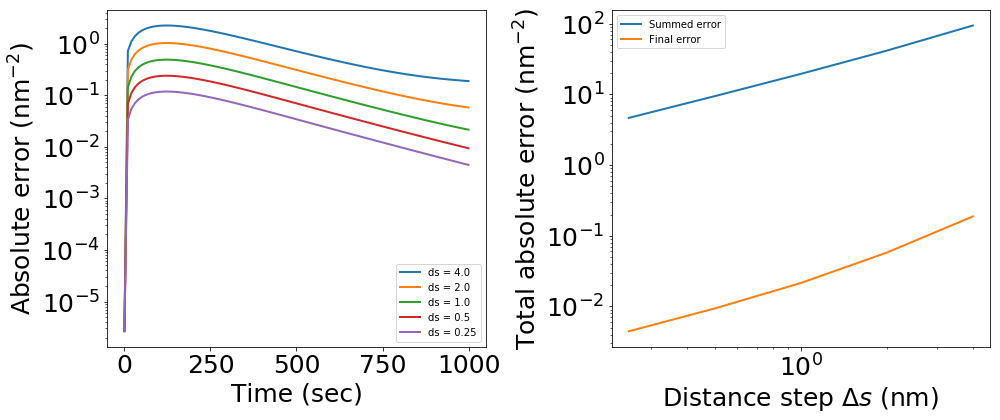

In [11]:
h5_data_arr = [
        h5py.File('tests/CN_tests/para_tests/ds_tests/simulations/ds4.00/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/ds_tests/simulations/ds2.00/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/ds_tests/simulations/ds1.00/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/ds_tests/simulations/ds0.50/s0/FP_pass_para_CN.h5', 'r'),
        h5py.File('tests/CN_tests/para_tests/ds_tests/simulations/ds0.25/s0/FP_pass_para_CN.h5', 'r')]
        
### Get all attributes
L1 = h5_data_arr[0].attrs['L1']
L2 = h5_data_arr[0].attrs['L2']
gamma = h5_data_arr[0].attrs['gamma']
beta = h5_data_arr[0].attrs['beta']
ds_arr = [dat.attrs['ds'] for dat in h5_data_arr]
# Get time points
time = np.asarray(h5_data_arr[0]['time'])
nt = np.asarray(time.size)
err_arr = np.zeros(nt)
# Get solution and space points


# Get error over time for each run
err_time_arr = [np.zeros(nt) for i in range(len(ds_arr))]
tot_sum_err_arr = []
tot_end_err_arr = []
for dat, err_arr, ds in zip(h5_data_arr, err_time_arr, ds_arr):
    s1 = np.asarray(dat['MT_data/s1'])
    s2 = np.asarray(dat['MT_data/s2'])
    X, Y = np.meshgrid(s1, s2)
    xl_dist = np.asarray(dat['XL_data/XL_distr'])
    for i in range(nt):
        Z = C11Neumann(time[i], X, Y, L1, L2, gamma, beta)
        err = xl_dist[:,:,i] - Z
        err_arr[i] = np.sqrt(ds*ds*np.sum(np.square(err)))
    tot_sum_err_arr += [np.sum(err_arr)]
    tot_end_err_arr += [err_arr[-1]]
        
# Make figures
fig, axarr = plt.subplots(1,2, figsize=(14,6))

for err_arr, ds in zip(err_time_arr, ds_arr):
    axarr[0].semilogy(time, err_arr, label="ds = {}".format(ds))
axarr[0].legend()
axarr[0].set_ylabel('Absolute error (nm$^{-2}$)')
axarr[0].set_xlabel('Time (sec)')
axarr[1].loglog(ds_arr, tot_sum_err_arr, label="Summed error")
axarr[1].loglog(ds_arr, tot_end_err_arr, label="Final error")
axarr[1].set_xlabel('Distance step $\Delta s$ (nm)')
axarr[1].set_ylabel('Total absolute error (nm$^{-2}$)')
axarr[1].legend()
plt.tight_layout()

# Higher order eigenfunctions

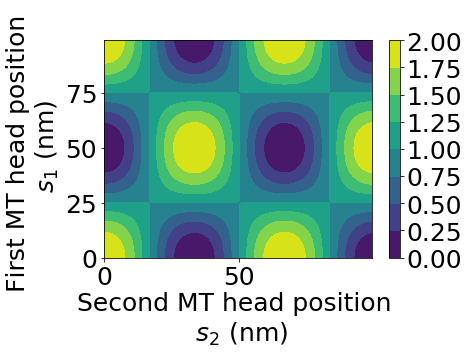

In [20]:
# Testing initial condition function
L1 = 100
L2 = 100
ds = 1
s1 = s2 = np.arange(0, 100, ds)
gamma = 1. 
beta = 1.
m = 2
n = 3
Y, X = np.meshgrid(s1, s2)
Z = CmnNeumann(0, X, Y, L1, L2, gamma, beta, m, n).T
h = plt.contourf(X,Y,Z)
plt.ylabel('First MT head position \n $s_1$ (nm)')
plt.xlabel('Second MT head position \n $s_2$ (nm)')
plt.colorbar(h)
plt.show()

In [13]:
# Testing solver initialization
pde_solver_mn = FPPassiveParaCNSolver('tests/CN_tests/para_tests/CNnm_tests/CN23/FP_passive_params.yaml')

Time step:  1.0
Total time:  1000.0
Number of steps:  1000.0
ds1:  1.0
ds2:  1.0
  (0, 0)	2.0
  (1, 0)	1.9980267284282716
  (2, 0)	1.992114701314478
  (3, 0)	1.9822872507286888
  (4, 0)	1.968583161128631
  (5, 0)	1.9510565162951536
  (6, 0)	1.9297764858882513
  (7, 0)	1.9048270524660196
  (8, 0)	1.8763066800438635
  (9, 0)	1.844327925502015
  (10, 0)	1.8090169943749475
  (11, 0)	1.770513242775789
  (12, 0)	1.7289686274214116
  (13, 0)	1.6845471059286887
  (14, 0)	1.6374239897486897
  (15, 0)	1.5877852522924731
  (16, 0)	1.5358267949789965
  (17, 0)	1.4817536741017152
  (18, 0)	1.4257792915650727
  (19, 0)	1.368124552684678
  (20, 0)	1.3090169943749475
  (21, 0)	1.2486898871648546
  (22, 0)	1.1873813145857246
  (23, 0)	1.1253332335643043
  (24, 0)	1.0627905195293132
  :	:
  (77, 101)	0.8752229997626646
  (78, 101)	0.8134502903211277
  (79, 101)	0.7524138073572386
  (80, 101)	0.6923544339843386
  (81, 101)	0.6335091971106116
  (82, 101)	0.5761103320021685
  (83, 101)	0.5203843657565439
 

[[2.00000000e+00 1.99556196e+00 1.98228725e+00 ... 4.43803540e-03
  0.00000000e+00 4.43803540e-03]
 [1.99802673e+00 1.99359745e+00 1.98034893e+00 ... 6.40254952e-03
  1.97327157e-03 6.40254952e-03]
 [1.99211470e+00 1.98771166e+00 1.97454162e+00 ... 1.22883388e-02
  7.88529869e-03 1.22883388e-02]
 ...
 [1.99802673e+00 1.99359745e+00 1.98034893e+00 ... 6.40254952e-03
  1.97327157e-03 6.40254952e-03]
 [2.00000000e+00 1.99556196e+00 1.98228725e+00 ... 4.43803540e-03
  0.00000000e+00 4.43803540e-03]
 [1.99802673e+00 1.99359745e+00 1.98034893e+00 ... 6.40254952e-03
  1.97327157e-03 6.40254952e-03]]


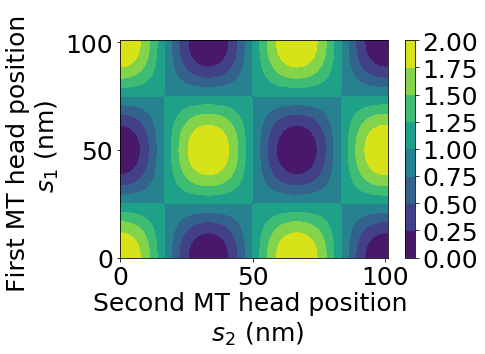

In [27]:
grid = CmnNeumannInit(pde_solver_mn, m,n)
print(grid.todense())
s1 = np.asarray(pde_solver_mn.s1)
#print(s1)
s2 = np.asarray(pde_solver_mn.s2)
cs = plt.contourf(s2, s1, grid.todense())
plt.ylabel('First MT head position \n $s_1$ (nm)')
plt.xlabel('Second MT head position \n $s_2$ (nm)')
plt.colorbar(cs)
plt.show()

In [16]:
pde_solver_mn.Save()

Point in time:  10
Summed error at time:  0.22489415514378172


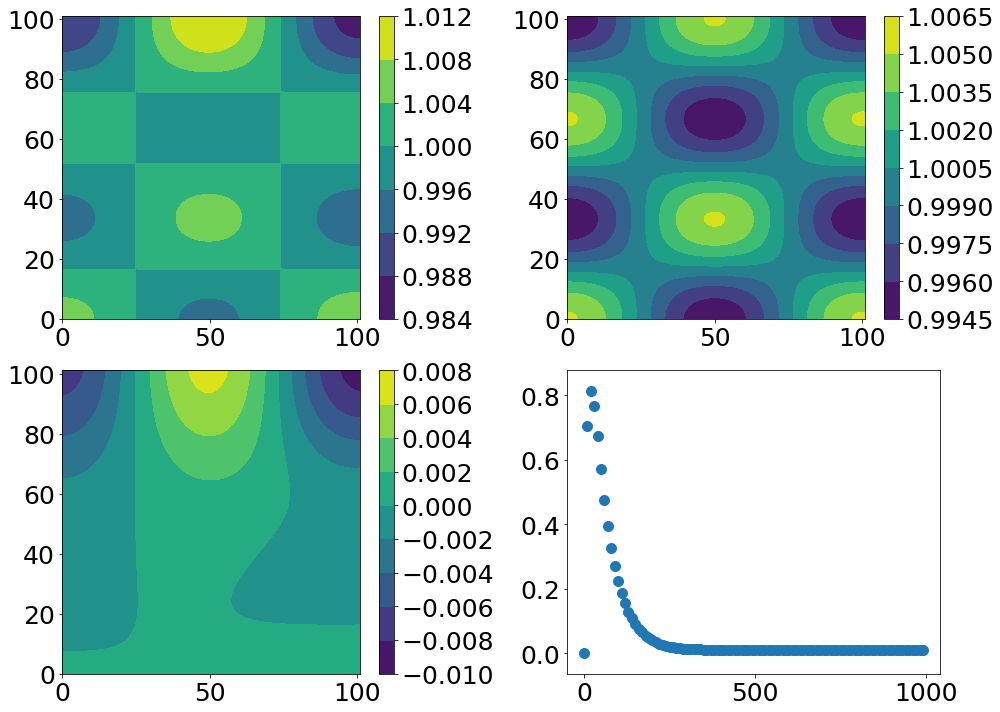

In [28]:
# Read in h5py file
h5_data = h5py.File('tests/CN_tests/para_tests/CNnm_tests/CN23/FP_pass_para_CN.h5', 'r')
L1 = h5_data.attrs['L1']
L2 = h5_data.attrs['L2']
gamma = h5_data.attrs['gamma']
beta = h5_data.attrs['beta']
dt = h5_data.attrs['dt']
# Get time points
time = np.asarray(h5_data['time'])
nt = np.asarray(time.size)
err_arr = np.zeros(nt-1)
rel_err_arr = np.zeros(nt-1)
# Get solution and space points
xl_dist = np.asarray(h5_data['XL_data/XL_distr'])
s1 = np.asarray(h5_data['MT_data/s1'])
s2 = np.asarray(h5_data['MT_data/s2'])

# Loop over time and get error for each step

Y, X = np.meshgrid(s1, s2)
for i in range(nt-1):
    Z = CmnNeumann(time[i], X, Y, L1, L2, gamma, beta,m,n)
    err = xl_dist[:,:,i] - Z
    #err_arr[i] = dt*np.sum(err)
    err_arr[i] = np.sqrt(dt*np.sum(np.square(err)))

time_point = 10
err_grid = xl_dist[:,:,time_point] - CmnNeumann(time[time_point], X, Y, L1, L2, gamma, beta,m,n)
#print(err_grid)
#print(np.sqrt(dt*np.sum(np.square(err_grid))))
print("Point in time: ", time_point)
print("Summed error at time: ", np.sqrt(dt*np.sum(np.square(err_grid))))
fig, axarr = plt.subplots(2,2, figsize=(14,10))
cs00 =axarr[0,0].contourf(X,Y,xl_dist[:,:,time_point])
cs01 = axarr[0,1].contourf(X,Y,CmnNeumann(time[time_point], X, Y, L1, L2, gamma, beta, m ,n))
cs10 = axarr[1,0].contourf(X,Y,err_grid)
fig.colorbar(cs00, ax=axarr[0,0])
fig.colorbar(cs01, ax=axarr[0,1])
fig.colorbar(cs10, ax=axarr[1,0])
axarr[1,1].scatter(time[:-1], err_arr)

plt.tight_layout()

Total crosslink number:  10402.012


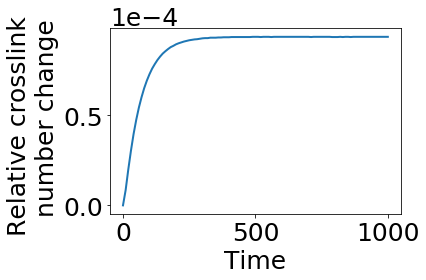

In [29]:
# Plot number of crosslinks over time
xl_num_arr = np.zeros(nt)
n_tot = np.sum(xl_dist[:,:,0])
print("Total crosslink number: ", n_tot)
for i in range(nt):
    xl_num_arr[i] = (np.sum(xl_dist[:,:,i])/n_tot)-1

plt.plot(time, xl_num_arr)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.ylabel("Relative crosslink \n number change")
plt.xlabel("Time")
plt.tight_layout()

(1, 2)


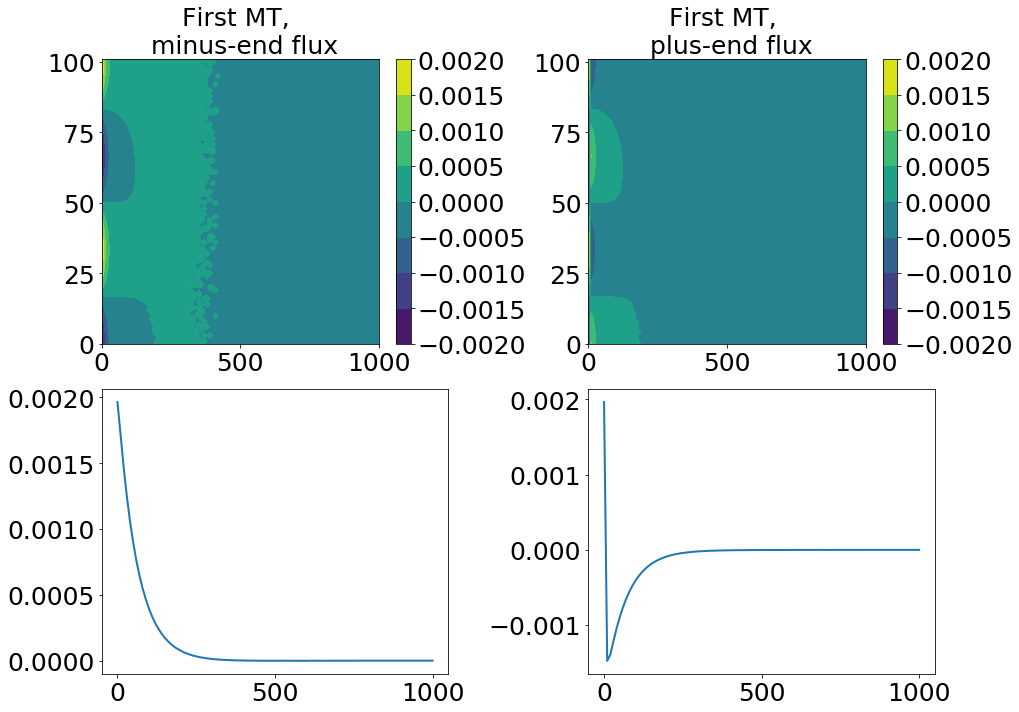

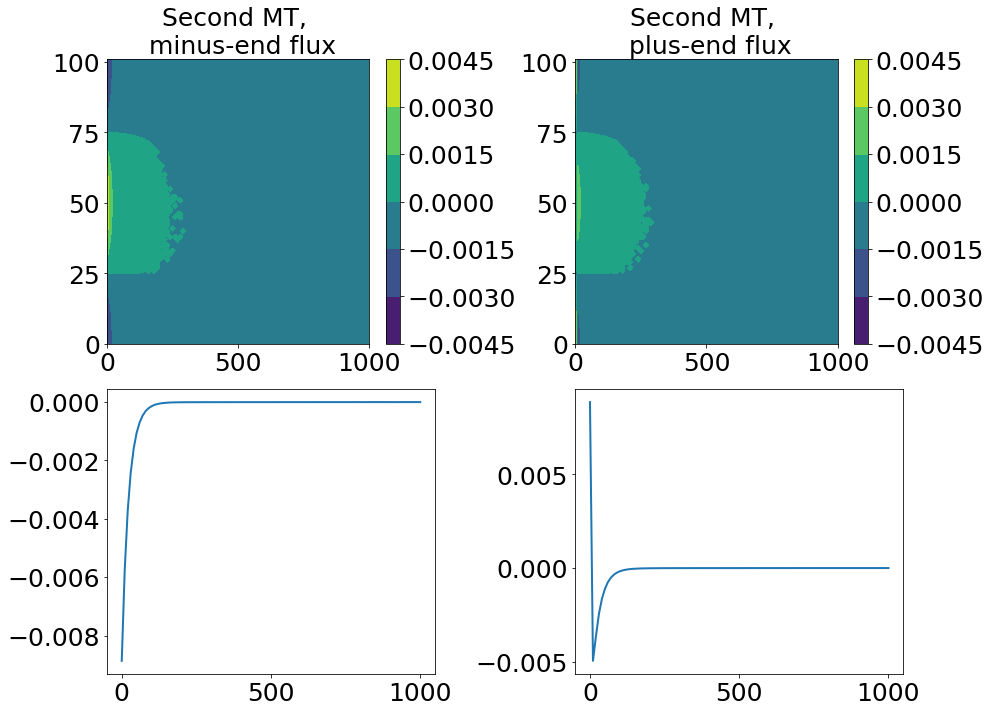

In [19]:
# Get the flux at the edge of tubules (Minus and plus ends of both microtubules)
# This is a first order accurate calculation whereas the solver should be second order accurate

deriv_ds = np.asarray([[-1./ds,1./ds]])
print(deriv_ds.shape)
## S1 minus end flux
# Rearrange matrix slice to so you can perform matrix operations accurately
S1m_flux = np.swapaxes(xl_dist[0:2,:, :],0,2)
S1m_flux = np.swapaxes(S1m_flux,1,2)
# Take first order derivative
S1m_flux = np.squeeze(np.matmul(deriv_ds, S1m_flux)) # First index is time, second index is other tubule location

## S1 Plus end flux
S1p_flux = np.swapaxes(xl_dist[-2:,:, :],0,2)
S1p_flux = np.swapaxes(S1p_flux,1,2)
S1p_flux = np.squeeze(np.matmul(deriv_ds, S1p_flux))

## S2 minus end flux
S2m_flux = np.swapaxes(xl_dist[:,0:2, :],0,2)
S2m_flux = np.swapaxes(S2m_flux,1,2)
S2m_flux = np.squeeze(np.matmul(S2m_flux, deriv_ds.T)) 

## S2 Plus end flux
S2p_flux = np.swapaxes(xl_dist[:,-2:, :],0,2)
S2p_flux = np.swapaxes(S2p_flux,1,2)
S2p_flux = np.squeeze(np.matmul(S2p_flux, deriv_ds.T))

# Graphing
fig, axarr = plt.subplots(2,2, figsize=(14,10))
csm = axarr[0,0].contourf(time, s2, S1m_flux[:-1,:].T)
fig.colorbar(csm, ax=axarr[0,0])
csp = axarr[0,1].contourf(time, s2, S1p_flux[:-1,:].T)
fig.colorbar(csp, ax=axarr[0,1])
axarr[1,0].plot(time, np.sum(S1m_flux[:-1,:],axis=1))
axarr[1,1].plot(time, np.sum(S1p_flux[:-1,:],axis=1))
axarr[0,0].set_title("First MT, \n minus-end flux")
axarr[0,1].set_title("First MT, \n plus-end flux")
plt.tight_layout()

fig2, axarr2 = plt.subplots(2,2, figsize=(14,10))
cs2m = axarr2[0,0].contourf(time, s1, S2m_flux[:-1,:].T)
fig2.colorbar(cs2m, ax=axarr2[0,0])
cs2p = axarr2[0,1].contourf(time, s1, S2p_flux[:-1,:].T)
fig2.colorbar(cs2p, ax=axarr2[0,1])
axarr2[1,0].plot(time, np.sum(S2m_flux[:-1,:],axis=1))
axarr2[1,1].plot(time, np.sum(S2p_flux[:-1,:],axis=1))
axarr2[0,0].set_title("Second MT, \n minus-end flux")
axarr2[0,1].set_title("Second MT, \n plus-end flux")
plt.tight_layout()